# <br> Linear Regression <br>

### <br> Agenda : <br>
  *  Introduction to Linear Regression
  *  Overfitting
  *  Regularization of linear models
  *  Data importing
  *  Data analyzing
  *  Data Cleaning
  *  Creating linear regression model
  *  Making predictions
  *  Evaluate model
  *  BONUS prediction using LassoCV and RidgeCV regularization
  *  Summary
  *  Resources  <br><br>
  
 

## <br> Introduction to Linear Regression <br><br>

Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable").<br>
It takes the following form:<br>

$y = \beta_0 + \beta_1x$

What does each term represent?<br><br>

$y$ is the response<br>
$x$ is the feature<br>
$\beta_0$ is the intercept<br>
$\beta_1$ is the coefficient for x<br>
Together, $\beta_0$ and $\beta_1$ are called the model coefficients.<br>
To create your model, you must "learn" the values of these coefficients.<br>
And once we've learned these coefficients, we can use the model to predict Sales!<br><br><br>

<img src='https://raw.githubusercontent.com/justmarkham/DAT4/068d887e4be2eedb1b958b345ae097153f762d75/notebooks/08_estimating_coefficients.png'> <br><br>
What elements are present in the diagram?<br><br>

*  The black dots are the observed values of x and y.
*  The blue line is our least squares line.
*  The red lines are the residuals, which are the distances between the observed values and the least squares line.
<br><br><br><br>

 ### <br> Overfitting <br> <br> 
What is <b>overfitting</b>?<br> <br> 

*  Building a model that matches the training data "too closely"
*  Learning from the noise in the data, rather than just the signal<br> <br> 

How does overfitting occur?<br> <br> 

*  Evaluating a model by testing it on the same data that was used to train it
*  Creating a model that is "too complex"<br> <br> 

What is the impact of overfitting?<br> <br> 

*  Model will do well on the training data, but won't generalize to out-of-sample data
*  Model will have low bias, but high variance<br> <br>

#### <br> Overfitting with linear models<br><br>

What are the general characteristics of linear models?<br><br>

*  Low model complexity
*  High bias, low variance
*  Does not tend to overfit<br><br>

Nevertheless, overfitting can still occur with linear models if you allow them to have high variance. Here are some common causes:<br><br>

<b>Cause 1:  Irrelevant features</b><br>
Linear models can overfit if you include "irrelevant features", meaning features that are unrelated to the response. Why?<br><br>

Because it will learn a coefficient for every feature you include in the model, regardless of whether that feature has the signal or the noise.<br><br>

This is especially a problem when <b>p</b> (number of features) is close to <b>n</b> (number of observations), because that model will naturally have high variance.<br><br>

Cause 2: <b>Correlated features</b><br>
Linear models can overfit if the included features are highly correlated with one another. <br><br>


Cause 3: <b>Large coefficients</b><br>
Linear models can overfit if the coefficients (after feature standardization) are too large. Why?<br><br>

Because the larger the absolute value of the coefficient, the more power it has to change the predicted response, resulting in a higher variance.<br><br><br><br>

### <br>Regularization of linear models<br><br>

*  Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero.
*  It reduces model variance and thus minimizes overfitting.
*  If the model is too complex, it tends to reduce variance more than it increases bias, resulting in a model that is more likely to generalize.<br><br>
Our goal is to locate the optimum model complexity, and thus regularization is useful when we believe our model is too complex.<br><br><br>

<img src='https://raw.githubusercontent.com/justmarkham/DAT8/ff04af83e8ac1409cd86f3cb3524e4141644c5a1/notebooks/images/bias_variance.png'><br><br><br>

Lasso regression and Ridge regression are most commonly used for regularization.<br>
A larger alpha parameter results in more regularization.<br><br>

#### Lasso regression <br> 
Lasso regression shrinks coefficients all the way to zero, thus removing them from the model.<br>
Formula : $$ {L}_{lasso} = \alpha \times | {slope}_1 +{slope}_2+..+ {slope}_n    | $$ <br> <br> 

#### Ridge regression  <br> 
Ridge regression shrinks coefficients toward zero, but they rarely reach zero.<br>
Formula : $$ {L}_{ridge } = \alpha \times ( {slope}_1^2 +{slope}_2^2+..+ {slope}_n^2    ) $$
<br><br><br>

 #### <br><br> About dataset :<br><br>
  Dataset have data about how much money in thousands was spent for advertising some product on TV,   Newspapers and Radio.<br>
  In 'Sales' column are stored data about how much money earned from sales in    thousands.<br><br>
  <b>Task</b>: How advertising on TV, Newspapers and Radio have impact on Sales.<br><br>
  This will help to make decision where to invest more money on ads.<br><br>  <b>Features</b> are columns <b>'TV'</b>, <b>'Newspaper'</b>, <b>'Radio' </b>.<br><br>  <b>Response</b> is column <b>'Sales'</b>.<br><br><br>

### <br> 1. Data importing<br>

In [1]:
# Import pandas

import pandas as pd

In [2]:
# Import numpy

import numpy as np

In [3]:
# Create dataframe 'sales' with data from csv file

sales=pd.read_csv(r"D:\SalesbyAdvertising.csv")

### <br> 2. Data analyzing <br>

In [4]:
# First 5 rows

sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# Describe data

sales.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
# Checking type of data

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
# All columns have numeric type

# Look's like index column is 'unnamed: 0' 
# I will rename column name from 'Unnamed: 0' to 'Index' and set index

sales.rename(columns={'Unnamed: 0':'Index'},inplace=True)
sales.set_index('Index')

,TV,Radio,Newspaper,Sales
Index,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8


In [8]:
# What is correlation between particular ad and sales ?
# First import matplotlib.pyplot and seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# Set sns
sns.set()

d:\program files\python\scripts\venv\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


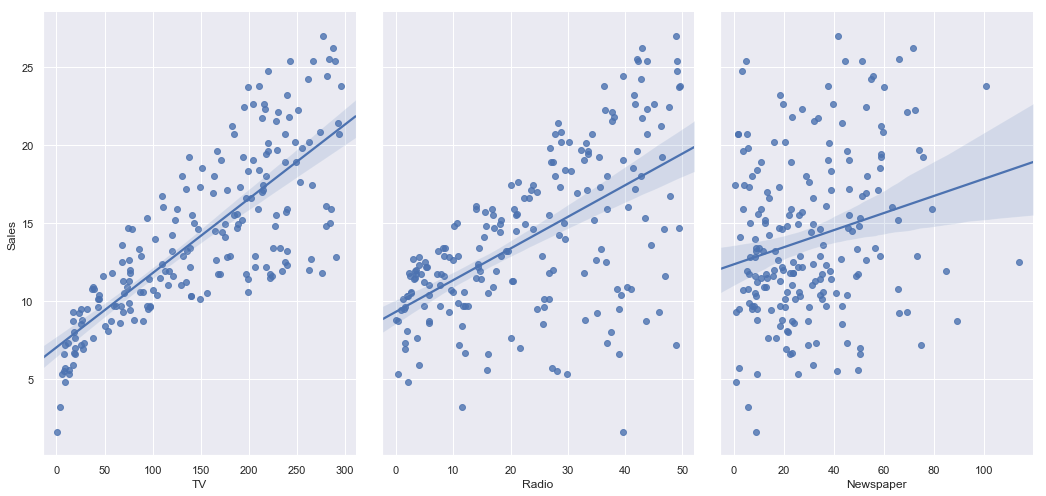

In [9]:
# visualize the relationship between the features and the response using scatterplots

sns.pairplot(sales,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.7,kind='reg')

In [10]:
# Looks like TV and Sales have very good correlation
# Radio and Sales have some correlation but Newspaper is not correlated
# Let's investigate it further

features=['TV','Radio','Newspaper','Sales']
correlation=np.round(sales[features].corr(),2)

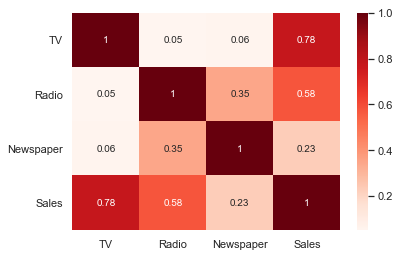

In [11]:
# Creaintg heatmap

sns.heatmap(correlation,annot=True,cmap=plt.cm.Reds)

 <br><b>TV</b> and <b>Sales</b> have correlation <b>0.78</b> which is strong correlation.<br>
 <b>Radio</b> and <b>Sales</b> have correlation <b>0.58</b> which means they have medium correlation.<br>
 <b>Newspaper</b> and <b>Sales</b> have correlation <b>0.23</b> which means they are not correlated.<br><br>

### <br>3. Data cleaning<br>

In [12]:
# Checking NaN's in data

sales.isna().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Since all columns are numeric I just needed to count how many NaN's are in the columns. <br>
All columns have 0 NaN's so data are ready for predictions.<br>
This will not always be the case and will  be needed to do some preparations.<br><br>

Let's create linear regression model.<br>

### <br> 4. Creatting linear model<br>

In [13]:
# Import linear regression from sklearn.linear_model

from sklearn.linear_model import LinearRegression

In [14]:
# Create X (feature) and y(responese) variables
# First I will create X with all columns (including Newspaper) and make prediction
# Later I will recreate X variable without Newspaper and make model comparision

X=sales.drop(['Index','Sales'],axis=1)
y=sales['Sales']


In [15]:
# Checking shapes
# X variable have 3 columns and y will type of Pandas Series

print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [16]:
# Split data into train and test sets
# First import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Splitting data into train and test sets
# Creating X_train, X_test, y_train and y_test variables
# I will not set test size parameter because default value is 25% and It is enough

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [17]:
# Let's create our linear regression model

model=LinearRegression()

In [18]:
# Fit data on train set

model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Let's see how much impact our features (slope value) have on Sales
# Reminder Linear Regression formula => y = a + bx
# Where 'a' is intercept and b is slope

feature_names=['TV','Radio','Newspaper']
print(np.round(model.intercept_,2))
print(model.coef_)

2.78
[0.04543356 0.19145654 0.00256809]


<br>
 TV = 0.04543356 <br>
 Radio = 0.19145654 <br>
 Newspaper = 0.00256809 <br>
 Let's rewrite formula <br>
 Sales = 2.78 + 0.04543356 x TV + 0.19145654 x Radio + 0.00256809 x Newspaper <br> <br>
 
How do we interpret the TV coefficient (0.0466)?<br><br>
For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a <b>0.0466</b> "unit" increase in Sales.<br><br>

<b>Or more clearly </b>: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 (thousand) items.<br>
 <br><br><br>
 
 <b> Tip </b>: coefficient also can be negative <br>
 So in this case if Newspaper's coeffictient is negative then if money is invested in that particular ad the number of sold items will be decreased.<br><br>

### <br> 5. Making predictions <br>

In [20]:
# Making prediction with train set
# Storing result in y_pred variable

y_pred=model.predict(X_test)

 <br>Let's see how our model is accurate and R-squared value<br>
 R-squared is a statistical measure of how close the data are to the fitted regression line.<br>
 It is also known as the coefficient of determination, or the coefficient of  multiple determination for multiple regression.<br><br>
 
R-squared is always between 0 and 100%:<br><br>

*  0% indicates that the model explains none of the variability of the response data around its mean.
*  100% indicates that the model explains all the variability of the response data around its mean.<br><br>

### <br> 6. Evaluate model <br>

In [21]:
# import metrics from sklearn

from sklearn import metrics

In [22]:
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

rmseWithN=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(rmseWithN)

1.6970632663793623


In [23]:
r2WithN=model.score(X,y)
print(r2WithN)

0.8967750611958448


In [24]:
# R-squared is 0.89 which means that 89% of data are explained with regression line

# Now let's create model again but now without 'Newspaper' column and check RMSE and R2

# Creating X and y
X=sales[['TV','Radio']]
y=sales['Sales']

# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

# Fitting model
model.fit(X_train, y_train)

# Making predictions
y_pred=model.predict(X_test)

# Checking RMSE
rmseWithoutN=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

# Checking R-squared
r2WithoutN=model.score(X,y)

In [25]:
# Now make comparison

print("RMSE with Newspaper : ",format(rmseWithN))
print("R2 with Newspaper : ",format(r2WithN))
print("RMSE without Newspaper : ",format(rmseWithoutN))
print("R2 without Newspaper : ",format(r2WithoutN))

RMSE with Newspaper :  1.6970632663793623
R2 with Newspaper :  0.8967750611958448
RMSE without Newspaper :  1.6893770318599997
R2 without Newspaper :  0.8969487223477477


<br><b> Conclusion</b>:
Our model is better without 'Newspaper' feature since there are no correlation between Sales and Newspaper ads.<br><br> 

### <br> BONUS: Linear model with LassoCV and RidgeCV <br>

#### <br> Lasso with cross validation<br>

In [26]:
# Import Lasso with cross validation from sklearn.linear_model

from sklearn.linear_model import LassoCV

In [27]:
# Creating LassoCV model
# n_alphas is number of alpha values to use
# normaliza=True means that data will be first scaled

lassoCV=LassoCV(n_alphas=100,normalize=True,random_state=2)

In [28]:
# Fit model to data
# I will fit model to the same train set which I created earlier

lassoCV.fit(X_train, y_train)

d:\program files\python\scripts\venv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=2, selection='cyclic',
        tol=0.0001, verbose=False)

In [29]:
# Now I will make predictions with test data

y_pred=lassoCV.predict(X_test)

In [30]:
# Calculating RMSE and R-squared

lassoCVrmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
lassoCVr2=lassoCV.score(X,y)

In [31]:
print("Lasso regression with cross validation RMSE:",format(lassoCVrmse))
print("Lasso regression with cross validation R-squared:",format(lassoCVr2))

Lasso regression with cross validation RMSE: 1.6889480354689266
Lasso regression with cross validation R-squared: 0.8969612595748477


It looks like with Lasso regression RMSE is slightly decreased.<br>
Now I will use Ridge regression and make predictions.<br>
Later I will compare all models.<br>

In [32]:
# First import RidgeCV from sklearn.linear_model

from sklearn.linear_model import RidgeCV

In [33]:
# Create model

# Range for alpha parameter
alphas_range=10.**np.arange(-2,3)

# Create model with alphas range
# Scalling data with normalizr=True
# Set scoring to r-squared

ridgeCV=RidgeCV(alphas=alphas_range,normalize='True',scoring='r2')

In [34]:
# Fit model to data

ridgeCV.fit(X_train,y_train)

RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), cv=None,
        fit_intercept=True, gcv_mode=None, normalize='True', scoring='r2',
        store_cv_values=False)

In [35]:
# Making predictions

y_pred=ridgeCV.predict(X_test)

In [36]:
# Calculating RMSE and R-squared

ridgeCVrmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
ridgeCVr2=ridgeCV.score(X,y)

In [37]:
print("Ridge regression with cross validation RMSE:",format(ridgeCVrmse))
print("Ridge regression with cross validation R-squared:",format(ridgeCVr2))

Ridge regression with cross validation RMSE: 1.687527197217106
Ridge regression with cross validation R-squared: 0.8969462317927411


In [38]:
# Now I will compare results from Lasso and Ridge regressions

print("Lasso regression with cross validation RMSE:",format(lassoCVrmse))
print("Lasso regression with cross validation R-squared:",format(lassoCVr2))
print("Ridge regression with cross validation RMSE:",format(ridgeCVrmse))
print("Ridge regression with cross validation R-squared:",format(ridgeCVr2))

Lasso regression with cross validation RMSE: 1.6889480354689266
Lasso regression with cross validation R-squared: 0.8969612595748477
Ridge regression with cross validation RMSE: 1.687527197217106
Ridge regression with cross validation R-squared: 0.8969462317927411


<br> Because error is something that you will always want to minimize in this case Ridge regression's RMSE is slightly better.<br><br>

In [39]:
feature_names=['TV','Radio']
tv=np.round(ridgeCV.coef_[0],3)
radio=np.round(ridgeCV.coef_[1],3)

print(" TV coefficient : ",tv)
print(" Radio coefficient : ",radio)

SalesWithTVAd1000=int(tv*1000)
SalesWithRadioAd1000=int(radio*1000)

print("\nBy investing 1000$ just in TV  ads sales amount will be ($ units): ",format(SalesWithTVAd1000)+'.000 $')
print("By investing 1000$ just in Radio  ads sales amount will be ($ units): ",format(SalesWithRadioAd1000)+'.000 $')


 TV coefficient :  0.045
 Radio coefficient :  0.191

By investing 1000$ just in TV  ads sales amount will be ($ units):  45.000 $
By investing 1000$ just in Radio  ads sales amount will be ($ units):  191.000 $


### <br> Summary <br><br>

Linear regression is used when you predicting a continuous response.<br><br>
<b> $y = \beta_0 + \beta_1x$ </b><br><br>
What does each term represent?

<b> $y$ </b> is the response<br>
<b> $x$ </b> is the feature<br>
<b> $\beta_0$ </b> is the intercept<br>
<b> $\beta_1$ </b> is the coefficient for x<br><br>

Before creating linear regression model first what you need to do is to check correlation between data. Then select best features for your model and make predictions.<br><br>

*  R-squared will not be decreased if you have features with very weak correlation
*  Very high R-squared does not mean that your model is perfect
*  Very low R-squared does not mean that your model is bad
<br><br>

#### Advantages of regularized linear models:<br><br>

*  Better performance
*  L1 regularization performs automatic feature selection
*  Useful for high-dimensional problems (p > n)<br><br>

#### Disadvantages of regularized linear models:<br><br>

*  Tuning is required
*  Feature scaling is recommended
*  Less interpretable (due to feature scaling)<br><br>

#### <br> Resources <br> <br>

*  Linear Regression - <a href='https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f'>Toward's Data Science article about Linear Regression with scikit-learn</a><br><br>
*  Feature selection -  <a href="https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e">TowardsDataScience article about Feature selection</a><br><br>
*  Ridge and Lasso -  <a href="https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b">TowardsDataScience article about Ridge and Lasso Regresion</a><br><br>

Videos about Ridge and Lasso regularizations<br><br>
Ridge -> https://www.youtube.com/watch?v=Q81RR3yKn30 <br>
Lasso -> https://www.youtube.com/watch?v=NGf0voTMlcs <br><br>

